Importing all neccesary libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import joblib

Importing Tips Data From Seaborn

In [4]:
df= sns.load_dataset('Tips')

In [5]:
df.head(). max()

total_bill     24.59
tip             3.61
sex             Male
smoker            No
day              Sun
time          Dinner
size               4
dtype: object

Understanding the data

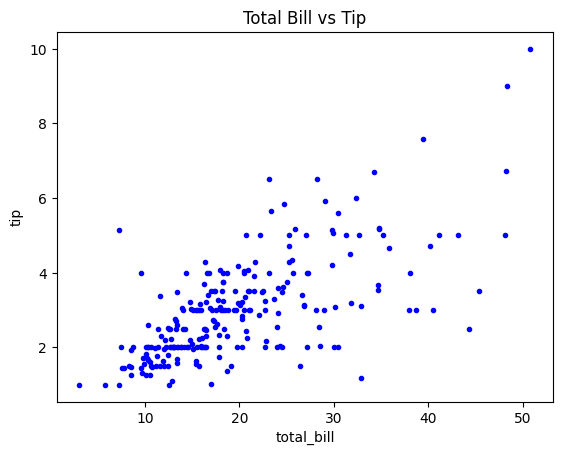

In [6]:
#Visualising the Tips data using scatter plot(total bill vs tip)
plt.scatter(df['total_bill'], df['tip'], color ='blue', marker= '.')
plt.title('Total Bill vs Tip')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

Preparing Data for Machine Learning

In [7]:
#Split data into feature x (dependent variable), and target y (independent variable)
x= df[['total_bill']]
y= df[['tip']]

#Split data into training (20%) and testing (80%)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)


Buiding Machine Learning Model

In [8]:
#Create and train the model......define a variable called 'model'
model= LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

Making Prediction

In [9]:
# Create a variable called y_pred
y_pred = model.predict(x_test)
y_pred

array([[3.04525623],
       [1.86330727],
       [3.55119456],
       [3.69452593],
       [2.31576375],
       [2.83881627],
       [3.96728338],
       [2.26014262],
       [2.50615915],
       [2.57033737],
       [2.88160176],
       [2.07723468],
       [2.06439904],
       [2.47407003],
       [2.00236009],
       [2.91903905],
       [2.92652651],
       [3.23351235],
       [2.68478854],
       [5.33107064],
       [3.13831465],
       [3.13403611],
       [2.4558862 ],
       [1.94673896],
       [3.16077703],
       [2.17564129],
       [2.02375283],
       [3.62927807],
       [2.68906708],
       [6.07767732],
       [4.99734388],
       [1.75313465],
       [2.83025918],
       [3.09552917],
       [2.74040966],
       [3.50092162],
       [2.21200895],
       [5.53644096],
       [2.33287794],
       [3.35010279],
       [2.04942412],
       [2.47834858],
       [3.48701634],
       [2.03017065],
       [2.03124029],
       [1.25361414],
       [2.05798121],
       [2.924

Understanding the Model

In [10]:
print(f'slope(m): {model.coef_[0]}')
print(f'intercept(b): {model.intercept_}')

slope(m): [0.10696371]
intercept(b): [0.92523556]


Evaluating the  Model

In [11]:
mse = mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)
r2= r2_score(y_test,y_pred)

print(f'mean squared error:{mse:.2f}')
print(f'root mean squared error:{rmse:.2f}')
print(f'r-squared score:{r2:.2f}')

mean squared error:0.57
root mean squared error:0.75
r-squared score:0.54


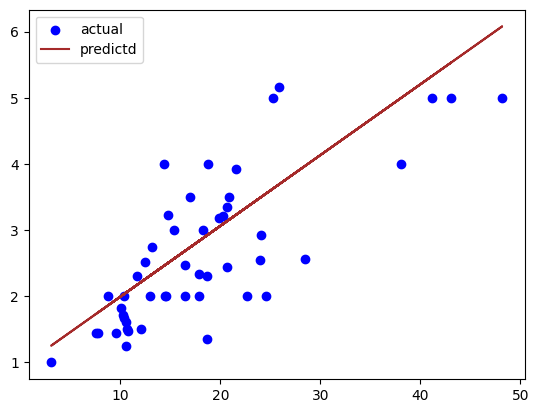

In [13]:
#Predicted Tip vs Test Tip (using scatter and line plot)
plt.scatter(x_test, y_test, color='blue', label='actual')
plt.plot(x_test, y_pred, color='brown', label= 'predictd')
plt.legend()
plt.show()

In [16]:
#Saving model
joblib.dump(model, 'Customer_Tip_Prediction.joblib')

['Customer_Tip_Prediction.joblib']

Importing Saved Model For Prediction

In [17]:
#create a variable 'stored_model'
stored_model = joblib.load("Customer_Tip_Prediction.joblib")

In [18]:
#create a variable 'new_customer' and assign a total_bill
new_customer = [[30]]
Predicted_tip = stored_model.predict(new_customer)
print(f"Predicted tip:dollars{Predicted_tip[0]}")


Predicted tip:dollars[4.13414676]


C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In the predicted tip vs test tip plot(see above), a total_bill of $30 will give approximately $4 tip. This shows that the model is able to make accurate prediction.

In [19]:
joblib.dump(model,"Customer_Tip_Prediction.joblib")

['Customer_Tip_Prediction.joblib']